# Scientific Programming Project
#### Kajenthini Kobivasan & Tereza Machackova

## Introduction

### Description of data collection and key analysis ideas

For our project, we used the public film database of ProCinema, Swiss Association for Cinema and Film Distribution. The film database includes all films that have been shown in Swiss cinemas since 1995. Currently, the database has information on more than 12,000 titles.

Examining the ProCinema database is interesting for several reasons. Firstly, most people know movies and actors and can understand the relationships quite easily. Therefore, the complex relationships between actors arouse the curiosity of most viewers. Also, the dataset contains extensive information about each movie and actor, which provides a solid basis for a variety of data analyses. The dataset is sufficiently clean and structured to allow analysis without using semantic matching techniques.
Our goal is to analyze all movies as well as the main co-actor relationships. We would like to get an overview of the film and actor space.

Link to data source: https://procinema.ch/de/statistics/filmdb/

### Verification of data validity

The data comes from a government organization. For this reason, we classified this movie database as trustworthy. We also carried out various random checks and compared the film data with other websites to make sure that are valid.

## 1. Data procurement

In [1]:
#all Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
pd.set_option('display.max_columns', None)
import networkx as nx
from networkx.algorithms import bipartite
import collections
import plotly.graph_objects as go

from sklearn.preprocessing import OneHotEncoder 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning) 

plt.rcParams["figure.figsize"] = (20,10)

### 1.1 Selenium

We use a separate Selenium code as a tool for data retrieval. This code is stored in the Data Retrieval folder.
It accesses the website procinema.ch and fetches the most important information and puts it structured into a .csv file.

Here is a first insight into our collected data:

In [2]:
df = pd.read_csv (r'../data/data.csv')
df.head()

,Original,Deutsch,Französisch,Italienisch,Schweiz_1,Schweiz_2,Regie,Produzent,Drehbuch,Musik,Schauspieler,Zugelassen ab,Empfohlen ab,Produktionsland,Genre,Media,Produktionsjahr,Originalsprache,Filmlänge,Ton,Kanton ZH,Kanton GE,Kanton BS,Kanton BE,3D,Link,IMAX,Kanton TI
0,Historia de la revolucion,NaN,NaN,NaN,NaN,114,NaN,3. Welt Verleih; 3. Welt Verleih,NaN,NaN,NaN,Nicht eingestuft,Nicht eingestuft,State not known or not indicated,Documentary,kein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The Juror,NaN,La Juree,NaN,31.05.1996,81'054,Brian Gibson,Rob Cowen Irwin Winkler,NaN,NaN,Demi Moore\r\nAlec Baldwin\r\nJames Gandolfini,Nicht eingestuft,Nicht eingestuft,United States,Drama,35mm,1995.0,English,117min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Die Grosse Ekstase des Bildschnitzers Steiner,NaN,NaN,NaN,NaN,37,Werner Herzog,NaN,Werner Herzog,NaN,Documentary,Nicht eingestuft,Nicht eingestuft,Germany,Documentary,16mm,1974.0,German,111min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Le Garcu,NaN,NaN,NaN,10.11.1995,4'820,Maurice Pialat,PXP Production,Maurice Pialat,NaN,Gérard Depardieu\r\nGéraldine Pailhas,Nicht eingestuft,Nicht eingestuft,France,Drama,"35mm (1:1,66)",1995.0,French,109min,Dolby A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bobo und die Hasenbande,NaN,NaN,NaN,01.12.1995,3'141,J. Koltai\r\nT. Hernadi,Feature Films Pannonia Film Ltd.; Real-Film,J. Nepp A. Dargay,Wolfgang von Henko,NaN,Nicht eingestuft,Nicht eingestuft,Germany,Animation,"35mm (1:1,66)",1995.0,German,73min,Dolby SR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Data analysis

### 2.1 Dataset description

Here we have checked how the dataset is structured and how many rows and columns it consists of. 
The titles and types of each column are shown below.

In [3]:
print ('Der Shape von den Daten ist:', df.shape, "\nTypen von den Kolonnen:")
print(df.dtypes)

Der Shape von den Daten ist: (12961, 28) 
Typen von den Kolonnen:
Original            object
Deutsch             object
Französisch         object
Italienisch         object
Schweiz_1           object
Schweiz_2           object
Regie               object
Produzent           object
Drehbuch            object
Musik               object
Schauspieler        object
Zugelassen ab       object
Empfohlen ab        object
Produktionsland     object
Genre               object
Media               object
Produktionsjahr    float64
Originalsprache     object
Filmlänge           object
Ton                 object
Kanton ZH           object
Kanton GE           object
Kanton BS           object
Kanton BE           object
3D                  object
 Link               object
IMAX                object
Kanton TI           object
dtype: object


In [4]:
df.describe(include="all")

,Original,Deutsch,Französisch,Italienisch,Schweiz_1,Schweiz_2,Regie,Produzent,Drehbuch,Musik,Schauspieler,Zugelassen ab,Empfohlen ab,Produktionsland,Genre,Media,Produktionsjahr,Originalsprache,Filmlänge,Ton,Kanton ZH,Kanton GE,Kanton BS,Kanton BE,3D,Link,IMAX,Kanton TI
count,12961,4020,3819,2780,11283,10615,12615,9715,10133,7705,11865,12961,12961,12321,12905,12842,12190.000000,12822,10792,7017,4168,2856,1590,2078,428,1,65,21
unique,12874,4002,3807,2776,3240,8043,7006,7750,8148,4600,10537,10,11,116,30,105,NaN,107,185,146,9,24,15,23,1,1,1,8
top,Paparazzi,Emma,Le Grand jeu,Piuma il piccolo orsetto polare,no release,50,Fritz Lang,Necati Akpinar,Woody Allen,Alexandre Desplat,Documentary,Nicht eingestuft,Nicht eingestuft,United States,Drama,35mm,NaN,English,90min,SR-D,J14,16 (16),14/11,14/12,yes,Verleih,yes,16
freq,3,2,2,2,1002,11,25,27,23,73,1039,8952,8960,3679,4208,3132,NaN,5252,609,3271,1193,520,438,563,428,1,65,6
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.591632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.765951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1913.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we will check the data for missing values.

In [5]:
df.isnull().sum()

Original               0
Deutsch             8941
Französisch         9142
Italienisch        10181
Schweiz_1           1678
Schweiz_2           2346
Regie                346
Produzent           3246
Drehbuch            2828
Musik               5256
Schauspieler        1096
Zugelassen ab          0
Empfohlen ab           0
Produktionsland      640
Genre                 56
Media                119
Produktionsjahr      771
Originalsprache      139
Filmlänge           2169
Ton                 5944
Kanton ZH           8793
Kanton GE          10105
Kanton BS          11371
Kanton BE          10883
3D                 12533
 Link              12960
IMAX               12896
Kanton TI          12940
dtype: int64

The dataset has 30 columns and except for the production year all columns are object-type. In addition, we have a lot of missing data in our dataset and also columns that are actually not needed. Before we can go into more detail about the data, we will first clean it up and then visualize it.

### 2.2 Data cleaning

In [6]:
df_clean = df.copy()

#### 2.2.1 Rename column name

First step is renaming the columns as follows:

In [7]:
df_clean.rename(columns={'Original':'Titel','Schweiz_1':'Kinostart','Schweiz_2':'Besucherzahlen'}, inplace=True)

#### 2.2.2 Add new columns

Now we will add three new columns to the dataframe.

In [8]:
df_clean['Titel übersetzt'] = np.where((df_clean['Deutsch'].isnull() & df_clean['Französisch'].isnull() & df_clean['Italienisch'].isnull()), False, True)
df_clean['Alterbegrenzung'] = np.where((df_clean['Zugelassen ab']) == 'Nicht eingestuft', False, True)
df_clean['In 3D'] = np.where((df_clean['3D'].isnull()), False, True)

#### 2.2.3 Remove unnecessary columns

For our further analysis, we decided to minimize our dataset and therefore remove some columns.

In [9]:
df_clean = df_clean.drop(['Deutsch','Französisch','Italienisch','Zugelassen ab','Empfohlen ab','Kanton ZH','Kanton GE','Kanton BS','Kanton BE','IMAX','Kanton TI','3D',' Link','Media','Ton'],axis=1)

#### 2.2.4 Change number columns to int/float

In [10]:
df_clean["Besucherzahlen"] = df_clean["Besucherzahlen"].str.replace("'","")
df_clean['Besucherzahlen'] = pd.to_numeric(df_clean['Besucherzahlen'], errors='coerce')

In [11]:
df_clean["Filmlänge"] = df_clean["Filmlänge"].str.replace("min","")
df_clean['Filmlänge'] = pd.to_numeric(df_clean['Filmlänge'], errors='coerce')

#### 2.2.5 Correct columns

In [12]:
df_clean["Schauspieler"].replace({"Documentary": np.nan, "Documentary:": np.nan, "Dokumentarfilm": np.nan, "Animation": np.nan}, inplace=True)

In [13]:
df_clean = df_clean.replace('-', np.NaN)

#### 2.2.6 Remove duplicates

From our previous analysis, we have determined that there are duplicates in the dataset that need to be removed. This allows us to remove about 50 records.

In [14]:
df_clean.shape

(12961, 16)

In [15]:
df_clean = df_clean.drop_duplicates(keep=False)

In [16]:
df_clean.shape

(12961, 16)

#### 2.2.7 Save cleaned data

For the network analysis we will now have the dataframe saved as a CSV file.

In [17]:
df_save = df_clean.copy()

In [18]:
#25 years
df_save = df_save[df_save.Produktionsjahr >= 1995]
df_save = df_save[df_save.Produktionsjahr < 2020]

In [19]:
#Save
df_save.to_csv("../data/25_year.csv", index=False)

### 2.3 Data visualization

#### 2.3.1 Visualize missing data

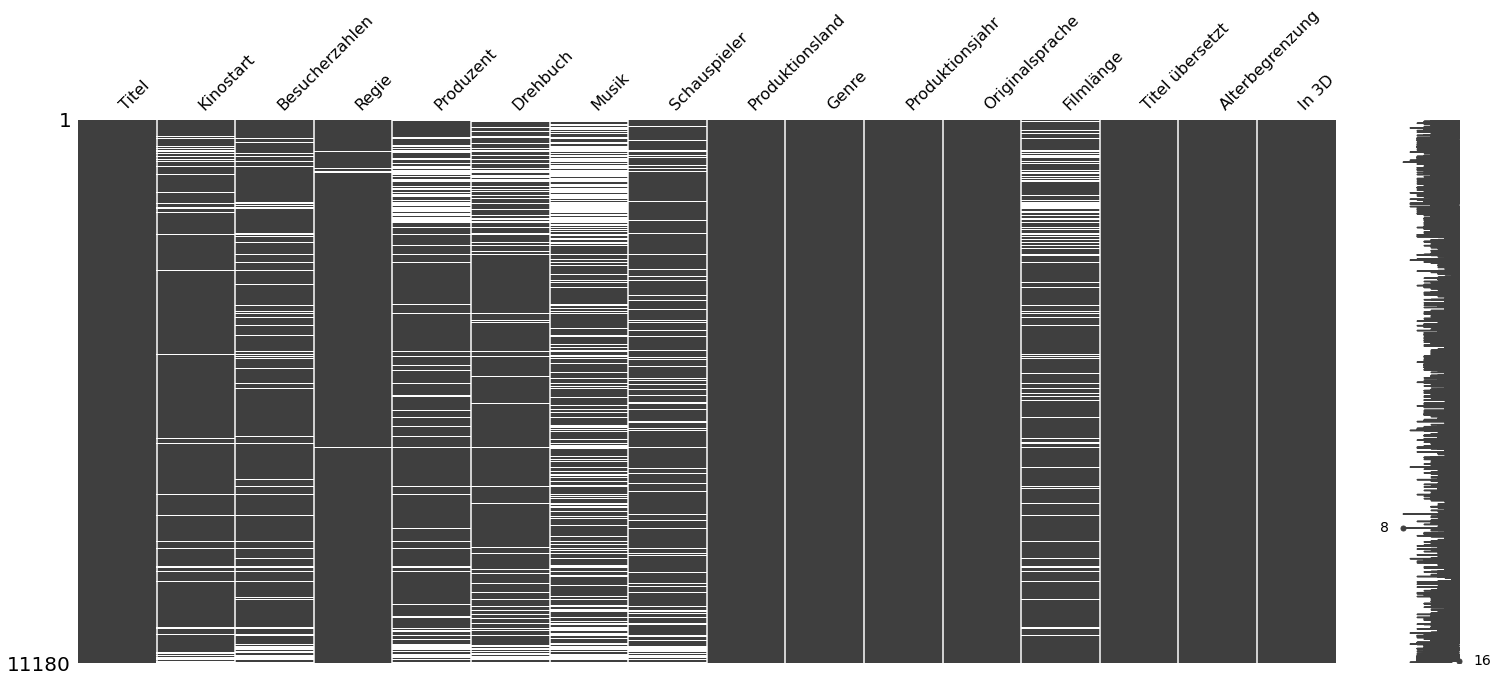

In [20]:
missingno.matrix(df_save[df_save.columns])
plt.show()

Here we see again an overview of the missing data in the dataset. Information about the number of visitors, producer, script, music, film length and gender is missing the most. In further analysis, it is important to note that some information may be missing.

#### 2.3.4 Genre comparison

Next, we would like to analyze the individual genres.

In [21]:
df_pi = df_clean.Genre.value_counts().to_frame()
#remove Genres, where are less than 1%
maxx = df_pi.max().tolist()[0]
min_value = maxx/100
df_pi = df_pi[df_pi['Genre']  > min_value]  

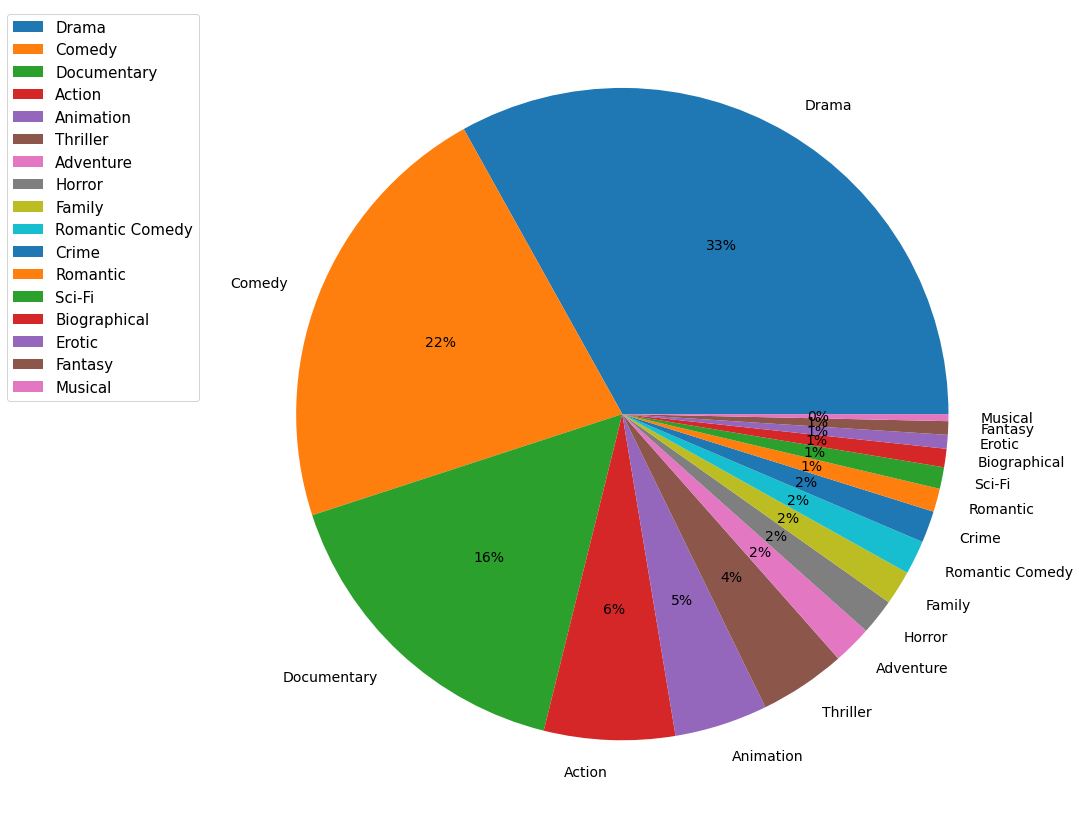

In [22]:
df_pi.plot.pie(y='Genre', figsize=(15, 15),autopct='%1.0f%%',fontsize=14)
plt.legend(bbox_to_anchor=(-0.01, 1),fontsize=15)
plt.ylabel('')
plt.show()

In the pie chart, we see the different genres and how often they appear in the database. Films that play with our emotions (drama and comedy) are shown most often in Swiss cinemas.

#### 2.3.5 Progression of visitor numbers over the years

In [23]:
# Filter the data by production year
df_clean = df_clean[df_clean['Produktionsjahr'] >= 1995]
df_clean = df_clean[df_clean['Produktionsjahr'] <= 2020]

# Calculate the production counts by year
df_year = df_clean['Produktionsjahr'].astype(int).value_counts().sort_index().reset_index()
df_year.columns = ['Produktionsjahr', 'Count']

# Create the bar chart
fig = go.Figure(data=go.Bar(
    x=df_year['Produktionsjahr'],
    y=df_year['Count'],
    marker=dict(
        color=df_year['Produktionsjahr'],
        colorscale='YlGnBu'
    )
))

# Customize the layout
fig.update_layout(
    title='Production figures by year',
    xaxis=dict(title='year'),
    yaxis=dict(title='count'),
    showlegend=False,
    coloraxis_colorbar=dict(title='Jahr')
)

# Add a range slider
fig.update_layout(xaxis_rangeslider_visible=True)

# Display the plot
fig.show()


The number of films shown continues to rise steadily despite Netflix and co. Since 1999, the number of visitors has never been as low as in the previous year. Here is also the clean evidence that in the Corona year 2020 there was a sharp decline in film screenings due to the lockdown measures.

#### 2.3.6 The top 5 genres, which have been visited most often

In [52]:
# Daten nach Genre gruppieren und die Summe der Besucherzahlen berechnen
df_genre = df_clean.groupby('Genre')['Besucherzahlen'].sum()

# Nach Besucherzahlen sortieren
df_genre = df_genre.sort_values(ascending=False)

# Top 5 Genres und Rest separat auswählen
top_genres = df_genre[:5]
other_genres = df_genre[5:]

# Balken für Top 5 Genres hinzufügen
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_genres.index,
    y=top_genres,
    marker=dict(color='red')
))

# Balken für Restliche Genres hinzufügen
fig.add_trace(go.Bar(
    x=other_genres.index,
    y=other_genres,
    marker=dict(color='blue')
))

# Beschriftungen
fig.update_layout(
    xaxis=dict(title='Genre'),
    yaxis=dict(title='Total number of visitors'),
    title='Distribution of visitor numbers by genre'
)

# Diagramm anzeigen
fig.show()


#### 2.3.7 Average film time

In [1]:
import csv

filename = "../data/data.csv"
rows = []

with open(filename, 'r', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    counter = 0
    sum = 0
    for row in csvreader:
        for i in row:
            if "min" in i[-3:] and i[0:2].isdigit():
                i = i.replace("min", "")
                counter += 1
                sum += int(i)
print("The result is:", sum /counter)

The result is: 102.3716034498748


The average lenght of the film from our dataset is 102,37 minutes. 

#### 2.3.8 Average film time within genre

Animation == 72
Horror == 76
Comedy == 80
Documentary == 80
Family == 80
Action == 83
Thriller == 83
Erotic == 83
Romantic == 84
Musical == 85
Sci-Fi == 86
Drama == 93
Adventure == 95
Romantic Comedy == 95
Crime == 97
Biographical == 99
Fantasy == 100


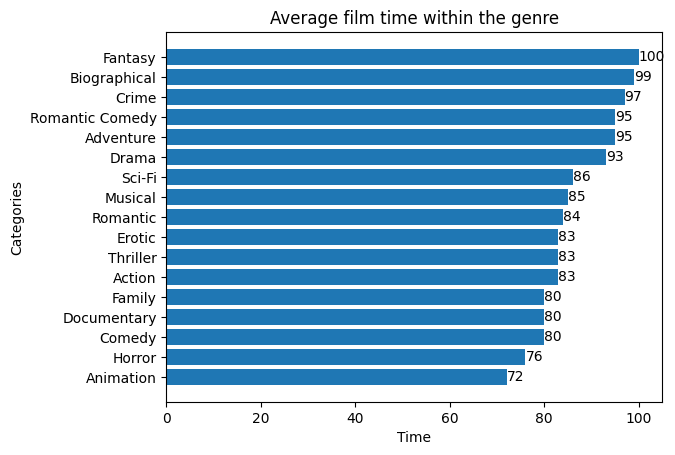

In [3]:
import csv
from pickle import NONE
filename = "../data/data.csv"
rows = []

def contains_item(string, items, size, time_sum):
    counter = 0
    for item in items:
        if item in string:
            size[counter] += 1
            time_sum[counter] += time(string)
        counter +=1

def time(row):
    for i in row:
        if isinstance(i, str) and "min" in i[-3:] and i[0:2].isdigit():
            i = i.replace("min", "")
            i = int(i)
            return i
    return 0
def average(list1, list2):
    for i in range(len(list1)):
        list1[i] = round(list1[i] / list2[i])
    return list1

with open(filename, 'r', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    labels = ["Drama","Comedy" ,"Documentary", "Action", "Thriller", "Animation", "Adventure", "Horror", "Family", "Romantic Comedy", "Crime", "Romantic", "Sci-Fi", "Biographical", "Fantasy", "Erotic", "Musical"]
    sizes = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    time_sum = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    counter = 0
    sum = 0
    for row in csvreader:
        contains_item(row, labels ,sizes, time_sum)
average = average(time_sum, sizes)
sorted_data = sorted(zip(labels, average), key=lambda x: x[1], reverse=False)
categories, values = zip(*sorted_data)

for i in range(len(sizes)):
    print(f'{categories[i]} == {values[i]}')
    
import matplotlib.pyplot as plt
import numpy as np
# Create a figure and axis
fig, ax = plt.subplots()

# Create the bar chart
bars = ax.barh(np.arange(len(categories)), values)

# Set the y-axis ticks and labels
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories)

# Add labels to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, values[i],
            ha='left', va='center')

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Categories')
ax.set_title('Average film time within the genre')

# Display the chart
plt.show()

Fantasy has the longest average running time within the genre, while Animation has the shortest.

#### 2.3.9 Language distribution

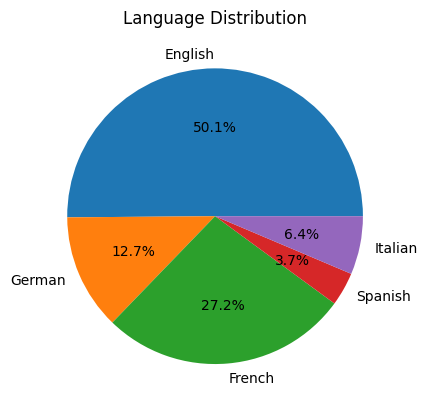

In [4]:
import csv
import imaplib
filename = "../data/data.csv"
rows = []
def contains_item(string, items, count):
    counter = 0
    for item in items:
        if item in string:
            count[counter] += 1
        counter +=1


with open(filename, 'r', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    labels = ["English","German" ,"French", "Spanish", "Italian"]
    sizes = [0,0,0,0,0]
    counter = 0
    sum = 0
    for row in csvreader:
        contains_item(row, labels ,sizes)
import matplotlib.pyplot as plt
plt.pie(sizes, labels=labels, autopct='%1.1f%%') 
plt.title('Language Distribution')
plt.show()

More than 50% of the films from the dataset were filmed in English. The second one with more than 27% is French, followed by German.

## 3. Social network analysis

In [ ]:
data_25_year = nx.read_gexf("../Gephi/Datenanalyse/25_year_one_connected.gexf")
data_25_year = nx.path_graph(data_25_year)
data_25_year = data_25_year.to_undirected()

For our first analysis, we used the information about the actors/actresses and their films over the last 25 years. The 25 years go from 1995 to 2019 included. Since 2020 became an exception with the numbers due to Corona, we did not use it for analysis.

### 3.1 Communities in the network

A community is a subgraph within a graph in which the nodes are very strongly connected to each other. In our case, we want to analyze the connectedness of the individual actors. Communities are formed around different movies. There are also often core members and peripheral members who tend to have fewer relationships with others. Here we can find out which actors are most respected in their community.

A connected component is understood as a set of nodes that are connected to each other via arbitrary paths. If a subnetwork is truncated, it forms a second component. 

For directed graphs, a distinction is made between strongly connected component and weakly connected component. In both connected component variants, each node is ultimately located in exactly one component.
A strongly connected component is defined by the fact that I reach all nodes along the edge direction.
Since this is an undirected graph, we cannot check what the strongly-connected components look like.

#### 3.1.2 Giant component

If a component contains a significant part of the nodes of the network, it is called a giant component.
Already during the first visualization in the Gephi, we can determine that there is a giant component in the data set. In the further analysis we will now analyze this giant component in more detail. 

A community shows how strongly the actuators are connected to each other. Also, the analysis identifies which individuals in the network are well connected and which are not, respectively which is the core network and which are the truncated sub-networks.

If the graph consists of several components, this can lead to the fact that information does not reach all actuators and the information flow is no longer guaranteed. In our case, however, this means that the individual communities are not connected to each other. Actors who are only connected through certain movies have no connection to the other actors. This disconnection from the information flow can occur when, for example, different actors work only in one language. Then we can see the different communities in the different languages.


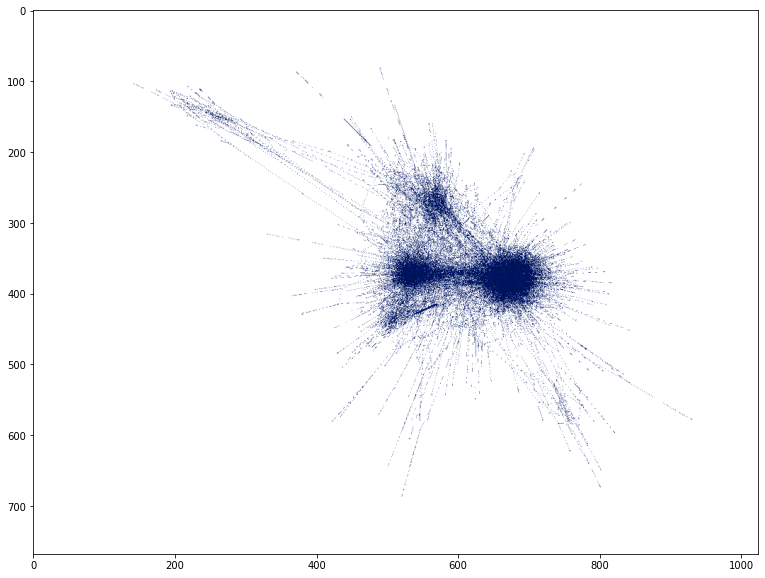

In [ ]:
# Read Images
img = mpimg.imread('../Bilder/Giant_component.png')
  
# Output Images
plt.imshow(img)
plt.show()

In the top graph you can see the giant component from our database, here we compare actor with title.

#### 3.1.3 k-Core

There are several ways in which a community can be identified, each with varying degrees of restrictiveness. 
The k-core is a maximum size subgraph, where each node must be connected to at least k other nodes of the
cluster must be connected. In a k-core, all nodes in a group have at least k links to other group members. Here, there is only a certain degree of connectedness.

To find out how the connectedness of the nodes stands, we used the k-core filter in Gephi. We found out that the nodes of this graph have at most 3 links to other group members. We also colored the graph in the individual modularity classes.

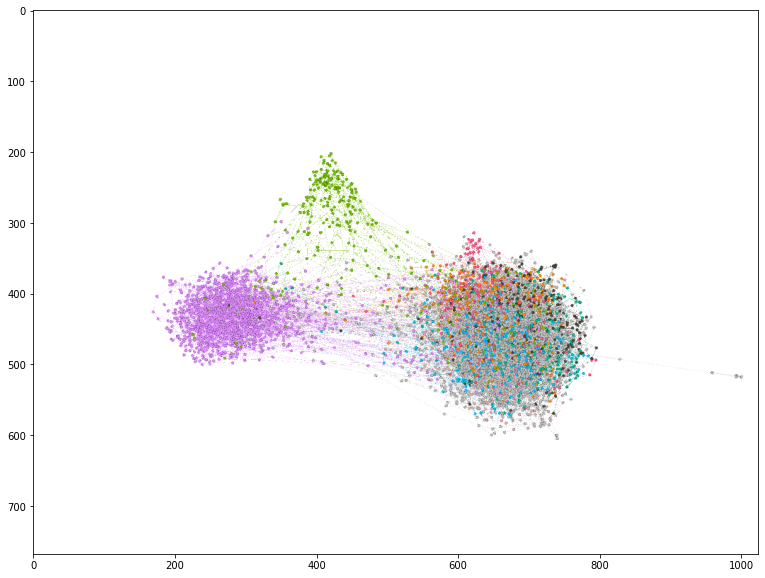

In [ ]:
# Read Images
img = mpimg.imread('../Bilder/3-Core-Modularity einfärbung.png')
  
# Output Images
plt.imshow(img)
plt.show()

By coloring, we can see that the first two modularity classes form a community that has at least three links to other nodes.

#### 3.1.4 Modularity based clustering

The modularity algorithm implemented in Gephi looks for the nodes that are more densely connected to each other than to the rest of the network.

When implementing this calculation, the colors indicate different communities determined by this algorithm. Basically, they indicate which actors are more densely connected to each other than to the rest of the network.

However, to make this information useful, you need to compare it to at least one other measure. For example, using the betweenness centrality measure, which shows how the most diverse communities connect to each other or the most influential nodes in the network serve as hubs, one can identify the most vulnerable relationships in each community. 

Using the highest degree, one can also filter out a community and identify the most connected routers within each community. All in all, modularity measurement allows us to identify vulnerabilities in a network and get an overview of its structure.

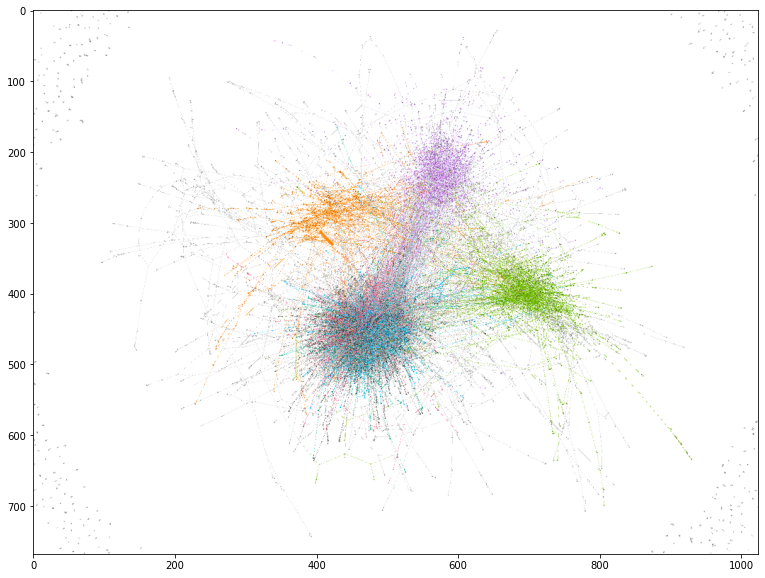

In [ ]:
img = mpimg.imread('../Bilder/Modularity_Class.png')
plt.imshow(img)
plt.show()

Here we have applied the modularity class for the whole dataset. Based on the modularity class, we can see four unique classes.

As a further step, we filtered only the first three modularity-class groups.

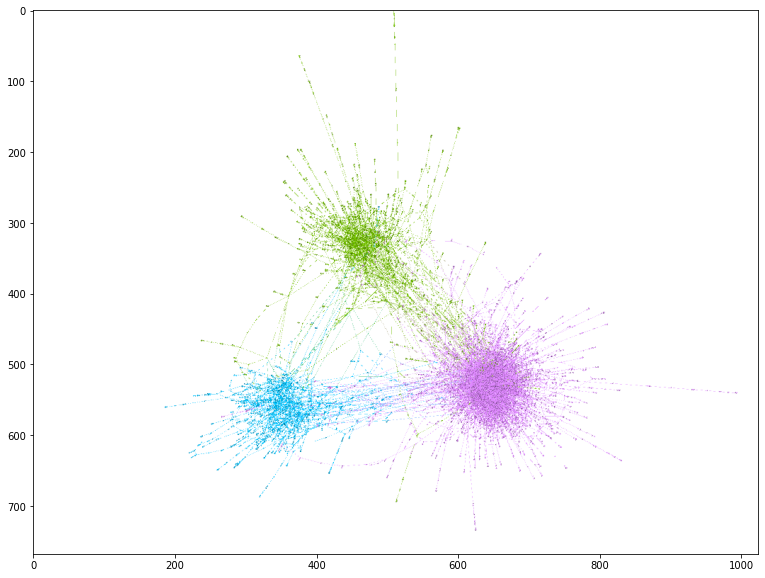

In [ ]:
img = mpimg.imread('../Bilder/Modularity-25.png')
plt.imshow(img)
plt.show()

#### 3.1.5 Two-Mode to One-Mode Projections (Test)

In a multirelational network, several relation types are mapped in the same network (in our case movies and actors). For a more accurate analysis, it is necessary to reduce the relation types. For this reason, we have taken 2015 as an example and changed the Two-Mode Projection to a One-Mode. 
However, it is interesting to extract different networks with different relation types from an original multirelational network and compare the analyses of these individual subnetworks again. In two-mode networks, unlike one-node networks, two different types of nodes exist. Edges exist only between nodes of different types (also called bipartite network). 
Interestingly, the number of edges of a node indicates how many connections exist to the other node type under the assumption that no parallel edges exist. The one-mode network cannot be applied to a two-mode network without adaptation. However, a two-mode network can be transformed into a one-mode network. There are several possibilities for such a transformation.

Here we have fetched for the movie data of the year 2015 and changed it into a one-mode network.

In [ ]:
data_2015 = nx.read_gexf("../Gephi/Datenanalyse/2015.gexf")

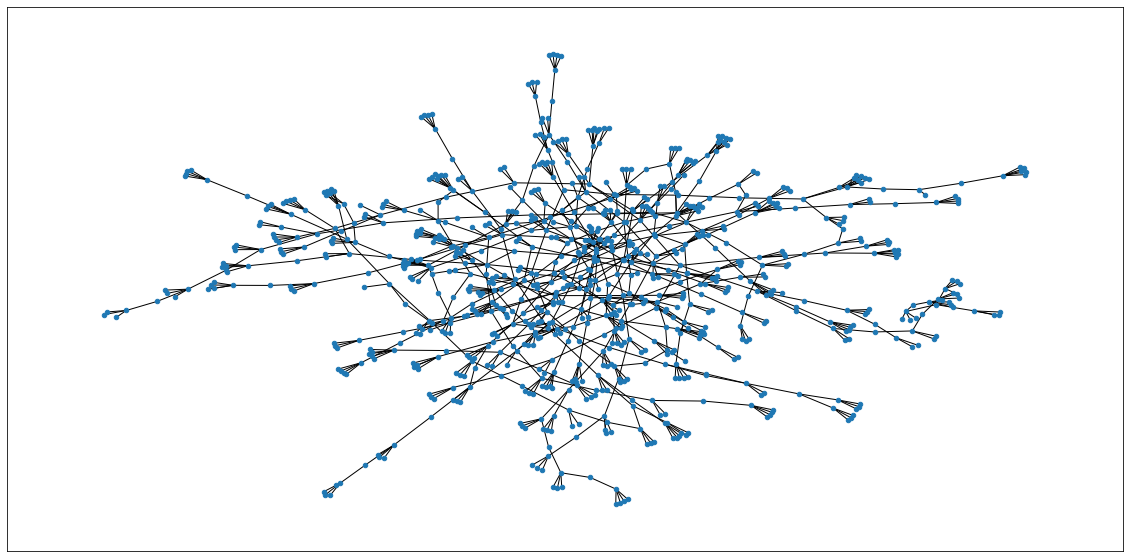

In [ ]:
nx.draw_networkx(data_2015, node_size = 20, with_labels=False)

In [ ]:
print(f"Is the graph bipartite? {nx.is_bipartite(data_2015)}")

Is the graph bipartite? True


By a simple transformation, all nodes of a type A, which have an edge to common nodes of type B, are connected in the resulting network.

In [ ]:
first_group, second_group = bipartite.sets(data_2015)
pos = nx.drawing.layout.spring_layout(data_2015, seed = 42)
def draw_emphasizing_edge_weight(G):
    pos = nx.drawing.layout.spring_layout(G, seed = 42)
                                                                                                      
    nx.draw_networkx_nodes(G, pos, node_color="lightblue")                                                                                                        
    nx.draw_networkx_labels(G, pos, font_size=15, font_family='sans-serif')

    for edge in G.edges(data='weight'):
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
    
simple_projection = bipartite.projected_graph(data_2015, first_group)

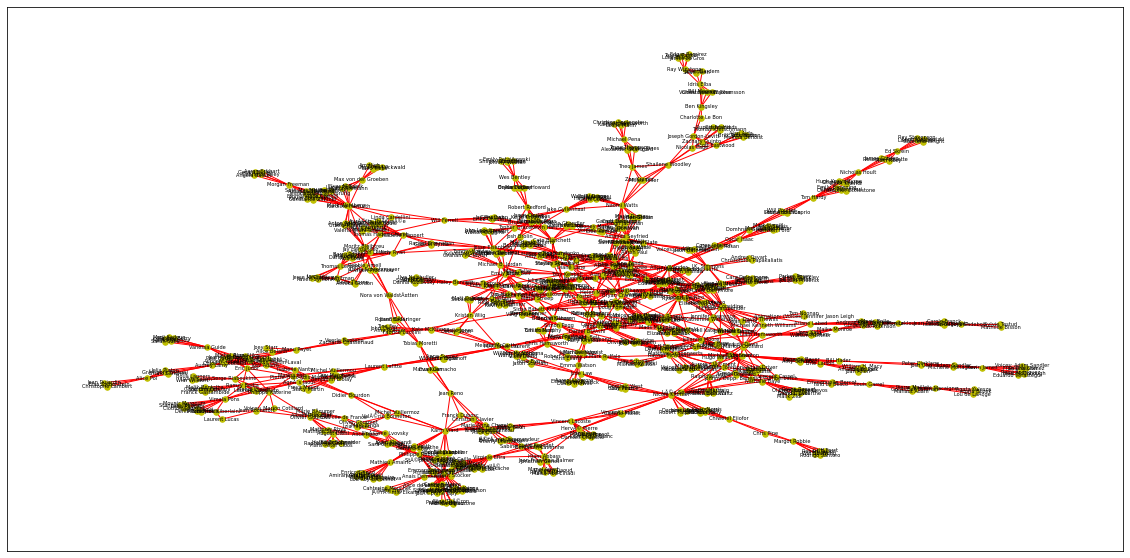

In [ ]:
nx.draw_networkx(simple_projection,node_size = 30,font_size = 5,node_color= "y", edge_color="r")

### 3.2 Centrality in networks

#### 3.2.1 Degree Centrality

Degree Centrality is a very simple centrality measure. It counts the number of edges that go away from a node or lead to a node. The sum of these edges then forms the degree of the node. Degree Centrality can be seen as a local measure. It says nothing about the complete network, but only provides an isolated view of a node.

Here we have found the actors who have a high degree value.

In [ ]:
df_25 = pd.read_csv ('../data/gephi_25_year_all.csv',low_memory=False)

In [ ]:
#clean imported data
translations = {'Ã©': 'é','Ã¼': 'ü','Ã¶': 'ö','Ã¤': 'ä','Ã„': 'Ä','Ã–': 'Ö','Ãœ': 'Ü'}
df_25.replace(translations, inplace=True, regex=True)

In [ ]:
df_25.sort_values(by=['Degree'], ascending=False)[['Id', 'Degree']].head()

,Id,Degree
0,Gérard Depardieu,55
1,Samuel L. Jackson,43
2,Nicole Kidman,42
3,Julianne Moore,41
4,Karin Viard,40


An actuator with a high degree value enjoys high perception and influence. He is very prominent in the network. Such people are suitable for spreading information or directly influencing others. A high degree value usually also means high activity. If an actor has many indegrees, there are also ways through which he can be informed. 
In our case, these are actors, very famous personalities, who have actively participated in various movies. Their degree value shows that over these 25 years they have acted in numerous films that have been shown in Switzerland.

#### 3.2.2 Closeness Centrality

Closeness Centrality calculates for each node how efficiently all other nodes can be reached from this node. The Closeness Centrality for a node is calculated by summing all inverses of the shortest distances to all other nodes. Now we will calculate the Closeness Centrality of the individual films in the 25 years.

In [ ]:
df_25.sort_values(by=['closnesscentrality'], ascending=False)[['Id', 'closnesscentrality']].head()

,Id,closnesscentrality
7359,Chico & Rita,1.0
12400,Ok jaanu,1.0
12584,Triple agent,1.0
15962,La vida es silbar,1.0
12571,Il Voto e segreto,1.0


An actuator with high Closeness Centrality can efficiently reach all other nodes in the network. It can be interpreted as a measure of the sequential spread of information starting from a node by always considering the shortest paths. Our five movies with the max highest Closeness Centrality values are not the most efficient in the network. These movies only have a high value because they form their own groups that are not connected to the rest of the network.

#### 3.2.3 Betweenness Centrality

Betweenness Centrality examines the position of a node considering the complete network.  It calculates for each node how much it is in a brokerage position. For this purpose, the shortest path from each node to all other nodes is calculated. For each node it is counted how often it is on shortest paths. The more often this is the case, the higher its betweenness centrality.

An actor with a high Betweenness Centrality plays a central role because a large part of the network's communication passes through this node. It also has the ability to influence the flow of information by preventing or encouraging the forwarding of messages. It can also manipulate the messages or make profit from the information. Actuators with a high Betweenness value also represent a critical point in the network, the failure of which can significantly affect the overall communication of the network.

In [ ]:
df_25.sort_values(by=['betweenesscentrality'], ascending=False)[['Id', 'betweenesscentrality']].head()

,Id,betweenesscentrality
9,Moritz Bleibtreu,0.023319
0,Gérard Depardieu,0.022168
29,Bruno Ganz,0.017873
32,Monica Bellucci,0.016664
59,Daniel Brühl,0.013356


Here we see five of these actors/actresses enjoying a high Betweenness Centrality.

##### Disadvantage of Centrality Analyses

The Degree, Closeness and Betweeness - Centrality explained above can be easily calculated. However, a weak point is that they are only local measures. They consider only just the adjacent nodes and not the complete network. However, it may not be important to have very many direct contacts, but to not be too far from the center.
In our example, it could mean that it is not important to have acted in several movies, but to have acted in important, successful movies.

### 3.3 Social network analysis

The actuator centralities calculate how central an actuator is based on local conditions or its position within the network. The network centralization combines all actuator centrality values into a single value which
tells how large the inequality of the actor centrality values are within the network.

For this analysis, we again take data from the last 25 years.

In [ ]:
df = pd.read_csv ('../data/gephi_25_year_all.csv',low_memory=False)

#### 3.3.1 Degree centralization

In [ ]:
degreecentrality = list(df["Degree"])
degree_list = []
for node in degreecentrality:
    maxi = max(degreecentrality)
    degree_list.append(maxi-node)
    
degree_zentralität = sum(degree_list)/((len(degree_list)-1)*(len(degree_list)-2))
degree_zentralität

0.0018864772328300791

#### 3.3.2 Betweenness centralization

In [ ]:
betweennesscentrality = list(df["betweenesscentrality"])
betweeness_list = []
for node in betweennesscentrality:
    maxi = max(betweennesscentrality)
    betweeness_list.append(maxi-node)  
    
betweeness_zentralität = sum(betweeness_list)/(len(betweeness_list)-1)
betweeness_zentralität

0.023162086608790638

#### 3.3.3 Closeness centralization

In [ ]:
closenesscentrality = list(df["closnesscentrality"])
closeness_list = []
for node in closenesscentrality:
    maxi = max(closenesscentrality)
    closeness_list.append(maxi-node)  
    
closness_zentralität = sum(closeness_list)/((len(closeness_list)-2)/2)
closness_zentralität

1.4788664621704637

#### 3.3.4 Density 

The graph density describes how completely the actuators of a graph are connected to each other. The density value always lies in the range between 0 and 1. The density value 0 stands for a graph in which there are no edges at all. The density value 1 describes a graph in which all nodes are connected to all other nodes. In graph theory, this is also called a complete graph or clique. 

Density is often an indicator of how fast information spreads in a network. In a dense network, communication is very direct. As the number of nodes in a large network increases, the number of possible edges also increases. However, the number of direct contacts between people remains roughly constant. Therefore, the density decreases with the size of the network. This is also a problem when comparing the density of different networks. The density also gives information about the cohesion of a network or a subnetwork, if only a part of the network is examined.


In [ ]:

print(f"Density: {nx.density(simple_projection)}") 

Density: 0.007380302654428182


We obtained a density of 0.007 and assume that the actuators in the network are very weakly connected.

#### 3.3.5 Cluster coefficient global

The Cluster coefficient is a measure for clique formation in a graph. A value of 1 means that it is a clique. A distinction is made between the local and the global Cluster coeffcient, whereby the global value is the mean value of the local values. The local cluster coefficient is calculated from the quotient of the number of direct edges between the neighbors of a node. For undirected networks like ours, multiply by a factor of 2 and the maximum possible number of direct edges.

In [ ]:
print("Clustering Coefficients of all nodes:")
cluster = nx.clustering(simple_projection)
for x in list(cluster)[0:10]:
    print ("key: {}, value: {} ".format(x,  cluster[x]))

Clustering Coefficients of all nodes:
key: Nicolas Cage, value: 1.0 
key: Samir Guesmi, value: 1.0 
key: Rufus, value: 1.0 
key: Toby Kebbell, value: 0.42857142857142855 
key: Liev Schreiber, value: 1.0 
key: Constance Zimmer, value: 1.0 
key: Olivia Williams, value: 0.42857142857142855 
key: Jean-FranÃ§ois Balmer, value: 1.0 
key: Gilles Lellouche, value: 1.0 
key: Rom Riley, value: 1.0 


Actors with a high clustering coefficient are strongly networked locally and may have formed closed triads due to longer or more intensive contacts. Strongly networked groups often have common interests and values. Our network consists of actors/actresses who are strongly connected to each other. This connection arises from the common films and film colleagues.

#### 3.3.6 Node connectivity

Graph connectivity examines how many elements, such as nodes or edges, must be removed from the graph to become disconnected. This makes it possible to examine how susceptible a network is to failures of nodes or edges. In order to make a statement about the connectivity of a graph, there are different viewpoints which can be examined.

In [ ]:
nx.is_k_edge_connected(simple_projection, 1)

True

In [ ]:
nx.is_k_edge_connected(simple_projection, 2)

False

Here we see that at a distance of 2 elements the graph is already disconnected.

### 3.4 Statistics in networks

In [55]:
df = pd.read_csv ('../data/25_year.csv',low_memory=False)

In [ ]:
encode_cols = df.drop(['Titel', 'Schauspieler','Kinostart'], axis=1)
categorical_features = encode_cols.select_dtypes(include='object').columns.to_list()
print('Categorical Features: ', categorical_features)

Categorical Features:  ['Regie', 'Produzent', 'Drehbuch', 'Musik', 'Produktionsland', 'Genre', 'Originalsprache']


In [ ]:
count_encodings = {}
for col in categorical_features:
    group = df.groupby(by=col).count().iloc[:,0]
    count_encodings[col] = dict(zip(group.index.to_list(), group.values))
for col in categorical_features:
    print('Currently processing..', col)
    df[col] = df[col].replace(count_encodings[col])

Currently processing.. Regie
Currently processing.. Produzent
Currently processing.. Drehbuch
Currently processing.. Musik
Currently processing.. Produktionsland
Currently processing.. Genre
Currently processing.. Originalsprache


#### 3.4.1 Spearman correlation

Spearman correlation measures whether the relationship between two variables corresponds to a monotonically increasing function. This means that f(x) always increases when x is increased.

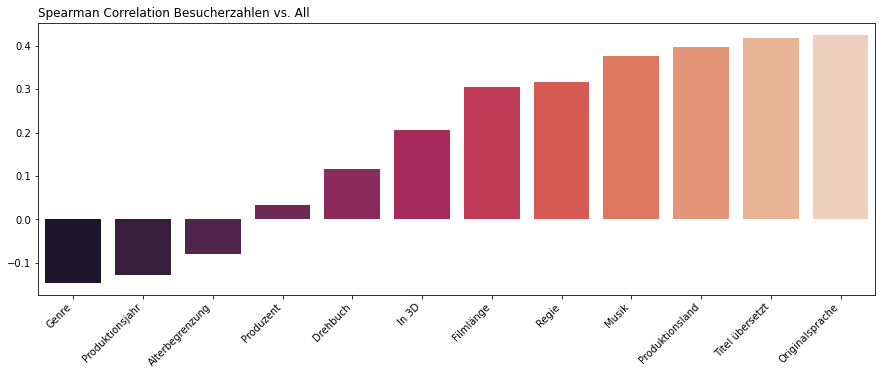

In [ ]:
tmp = df
tmp = tmp.corr(method='spearman')['Besucherzahlen'].drop(['index'], errors='ignore')
tmp = tmp[~tmp.index.isin(['Besucherzahlen'])]
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
p = sns.barplot(x=tmp.index, y=tmp.values, order=tmp.sort_values().index, palette='rocket')
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')
p.set_title('Spearman Correlation Besucherzahlen vs. All', loc='left')
plt.show()


In the upper graph you can see a Spearman correlation of visitor numbers. If the value is around 0, it means that these attributes do not exert much change on our target variable. Thus, we can see from the diagram that the language has the greatest influence on the number of visitors. This makes sense in our eyes, of course, because even in German or English, for example, that most viewers respond in Switzerland.

#### Question: Which director has directed the most films?
- Filtering: 
    - For this analysis, we take the director and movie title data. 
- Analysis:
    - We will do the analysis in Python and in Gephi and list which directors directed the most movies. For this we will calculate how many films are allocated per director.
- Expectation:
    - We have no expectation for this question and will be surprised by the result.
- Procedure:
    - We first filter all films that appear twice, because there is always only one director per film. Then we group the directors and get a list of how many films a director has directed.

In [ ]:
df_regie = df_clean.drop_duplicates(subset=['Titel'])
df_regie = df_regie.Regie.value_counts().to_frame()
print("Ergebnisse:")
df_regie.head()

Ergebnisse:


,Regie
Woody Allen,25
Clint Eastwood,20
Neri Parenti,17
Ron Howard,17
Ridley Scott,17


To verify our analysis, we still had Gephi display the data visually.

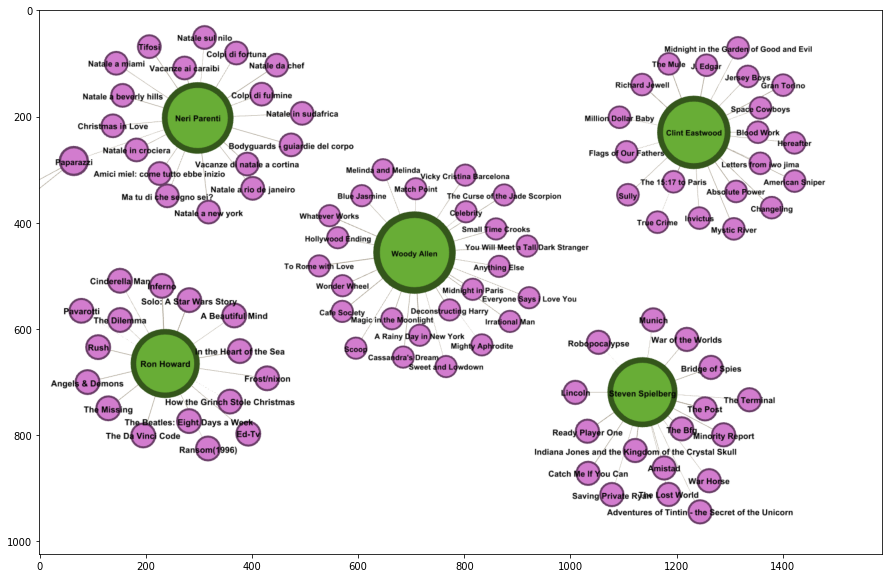

In [ ]:
# Read Images
img = mpimg.imread('../Bilder/Regie_Film.png')
  
# Output Images
plt.imshow(img)
plt.show()

- Interpretation:
    - We can see that Woody Allen has acted in most Films in this period. His successor Clint Eastwood directed 20 films.


#### Question: Which movies were most attended and whose actors were they?
- Filtering:
    - We'll do this analysis right away in Python, looking more closely only at the browse count data. Afterwards, we will add the information about the actors.
- Analysis:
    - By listing the most visited movies, we can identify which movies were the most popular. Using this list, we can then verify if there have been certain star actors/actresses over the past 25 years that have attracted many viewers.
- Expectation:
    - We think that there will certainly be star actors/actresses who have a certain fan base. In such cases, increased attendance can be expected.
- Procedure:
    - First, we again make sure that the film occurs only once, because the number of visitors per film is the same. At the same time, all actors who appear in the same film have to be grouped. Afterwards, the films can be listed with the sorted visitor numbers and supplemented with the list of actors.

In [ ]:
df_besucher = df_clean.drop_duplicates(subset=['Titel'])
df_besucher = df_besucher.sort_values(by=['Besucherzahlen'], ascending=False)
df_besucher = df_besucher[["Titel","Besucherzahlen"]]
list_schauspieler = df_clean.groupby(['Titel'])['Schauspieler'].apply(list)
print("Ergebnisse:")
pd.merge(df_besucher, list_schauspieler, on='Titel').head()

Ergebnisse:


,Titel,Besucherzahlen,Schauspieler
0,Titanic,1940840.0,[Leonardo DiCaprio\r\nKate Winslet\r\nBill Pax...
1,Intouchables,1446377.0,[François Cluzet\r\nOmar Sy\r\nAudrey Fleurot]
2,Skyfall,1199248.0,[Daniel Craig\r\nJavier Bardem\r\nRalph Fienne...
3,Avatar,1166796.0,[Sam Worthington\r\nSigourney Weaver\r\nZoe Sa...
4,Finding Nemo,1115846.0,[nan]


- Interpretation
    - The films with the high attendance figures are all films that should be familiar to everyone. In the movie "Finding Nemo" there are no actors because it is an animated movie. Based on this list, we can confirm that star actors like Leonardo DiCaprio or Daniel Craig surely attracted many visitors.

#### Question: Who are the most prolific actors and in what genres have they performed the most?
- Thesis / Question:	
    - Who are the most prolific actors and in what genres have they played the most?
- Filtering:
    - For this analysis, we will compare actors with genre. Before we can do this analysis, we need to filter the actors. For this reason, we have filtrated the prolific actors with the most films. With these actors we will analyze in which genres they have played the most.
- Analysis:	
    - We want to see who makes the most films and what are the genres of these films.
- Expectation:	
    - In the first analysis we found that drama, comedy and action are one of the most popular genres. For this reason, we assume that this genre is also played by the most prolific actors.
- Procedure:
    - Group the data by actor and count the occurrences
    - Sort the actors based on count in descending order
    - Get the top 10 most prolific actors
    - Create a dictionary to store the genres performed by each actor
    - Iterate over the top actors and find the genres they have performed in the most

In [58]:
# Group the data by actor and count the occurrences
actor_counts = df['Schauspieler'].value_counts()

# Sort the actors based on count in descending order
most_prolific_actors = actor_counts.index

# Get the top 10 most prolific actors
top_actors = most_prolific_actors[:10]

# Create a dictionary to store the genres performed by each actor
actor_genre_counts = {}

# Iterate over the top actors and find the genres they have performed in the most
for actor in top_actors:
    # Filter the data for the current actor
    actor_data = df[df['Schauspieler'] == actor]
    
    # Count the occurrences of each genre for the actor
    genre_counts = actor_data['Genre'].value_counts()
    
    # Get the most performed genre for the actor
    most_performed_genre = genre_counts.index[0]
    
    # Store the most performed genre in the dictionary
    actor_genre_counts[actor] = most_performed_genre

# Print the most prolific actors and the genres they have performed in the most
for actor in top_actors:
    genre = actor_genre_counts[actor]
    print(f"{actor}: {genre}")


Dokumentary: Documentary
Trickfilm: Animation
Dokumentation: Documentary
Vincent Lindon: Drama
Eddie Murphy: Comedy
Zeichentrickfilm: Animation
Mel Gibson: Action
Julie Delpy
Ethan Hawke: Drama
Daniel Radcliffe
Emma Watson
Rupert Grint
Helena Bonham Carter: Adventure
Robert Pattinson
Kristen Stewart
Taylor Lautner: Action


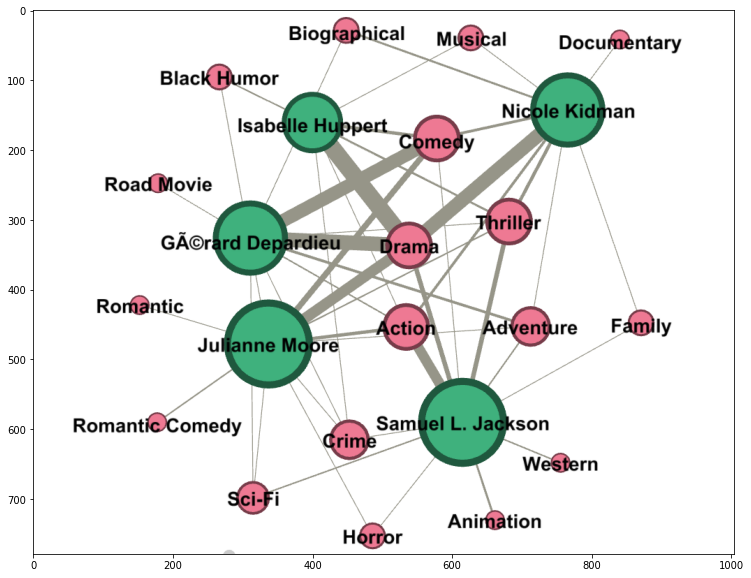

In [ ]:
# Read Images
img = mpimg.imread('../Bilder/Schauspieler-Genre.png')
  
# Output Images
plt.imshow(img)
plt.show()

- Interpretation:
    - For example, Gérard Depardieu acted in most of the films. His focus was on comedy and drama. His colleague Samuel L. Jackson, on the other hand, prefers to see his role in action and thrillers.
    - All these actors have acted at least once in the genres of comedy, drama, action and thriller.

#### Question: Which movie genres are the most popular?
- Filtering: 
    - Here we analyze the average number of visitors per genre.
- Analysis:
    - This analysis goes mainly only through Python, because here we have numerical columns and thus we approach this better computationally instead of graphically.
- Expectation:
    - Action movies are expected to attract the most visitors because it is also expected to cost the most according to us.
- Procedure:
    - Here, the genres are first grouped and at the same time all the numerical columns are taken together and the average is calculated.
    - Then only the data set is sorted and listed.

In [53]:
df_genre_mean = df_clean.groupby(['Genre']).mean()
df_genre_mean = df_genre_mean[["Besucherzahlen"]]
df_genre_mean = df_genre_mean.sort_values(by=['Besucherzahlen'], ascending=False)
print("Ergebnisse:")
df_genre_mean.head()

Ergebnisse:


,Besucherzahlen
Genre,
Fantasy,143327.567568
Spoof,134640.000000
Sci-Fi,97948.514019
Adventure,91112.524862
Action,91089.315457


- Interpretation
    - Genre "Spoof" on average brings the most visitors to the cinema halls. This was very surprising for us. "Spoof" movies didn't really run much in theaters during this time. Although drama and comey are by far the most produced, they don't attract that many people on average. probably the reason is that these movies are easy and cheap to produce.

## 5. Lessons learned

The data we collected was very time-consuming to collect and clean. In particular, we often reached our limits when we tried to use Gephi to analyze the individual networks. The program often had difficulty processing large amounts of data and we had to work with a lot of waiting time.
This was a great project to understand the different aspects of network analysis and to deepen different programming skills.